<H2>課題5: Deep Learning</H2>
<p>今回の課題では手書き文字の認識をNeuralnetworkを用いて行います。</p>
<p>下記2-3にKerasから手書き文字のデータをダウンロードするコードが記載されています。</p>
<p>このデータを用いてNeuralnetworkのTrainingを行い、その後に下記のnumber_fileをTest dataとして数字の認識を実施してください。</p>
<p>8・9章で学んだ内容を踏まえ、”4. Dataの前処理”以降の各セルに'#コメント'の内容を実行するコードを記入してください。</p>

<H2>1. 必要なモジュールの読み込み

In [1]:
%matplotlib inline
from __future__ import division, print_function

from keras import backend as K
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

C:\Users\ibuki\Anaconda3\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<H2> 2. Kerasよりデータを取得</H2>

<p>Kerasのデータセットは予めTraining setとTest setに分けられています。今回はそれを使用します。</p>

In [2]:
# Kerasに付属の手書き数字画像データをダウンロード
np.random.seed(0)
(X_train, labels_train), (X_test, labels_test) = mnist.load_data()

In [3]:
# Traning setのラベルを確認
labels_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
# Training setの概要確認
print(X_train.shape, labels_train.shape, sep='\n')

(60000, 28, 28)
(60000,)


In [5]:
# Test setの概要確認
print(X_test.shape, labels_test.shape, sep='\n')

(10000, 28, 28)
(10000,)


<H2> 3. 画像の表示</H2>
<p>画像がどのようなものか分からないので、表示して確認します。</p>

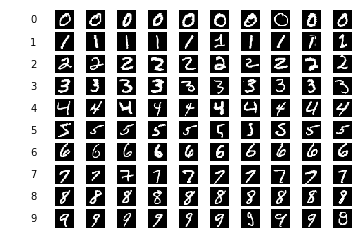

In [6]:
# Training setの画像を表示

import matplotlib.pyplot as plt

label_images = {label: [] for label in set(labels_train.tolist())}
for x, label in zip(X_train, labels_train):
    if all(len(images) >= 10 for images in label_images.values()):
        break
    if len(label_images[label]) >= 10:
        continue
    label_images[label].append(x)
    
for j, (label, images) in enumerate(label_images.items()):
    plt.subplot(10, 11, j * 11 + 1)
    plt.text(0.5, 0.5, label, ha='center', va='center')
    plt.axis('off')
    for i, image in enumerate(images):
        if i >= 10:
            continue
        plt.subplot(10, 11, j * 11 +  i + 2)
        plt.imshow(image, cmap='Greys_r')
        plt.axis('off')
plt.show()
    
del label_images

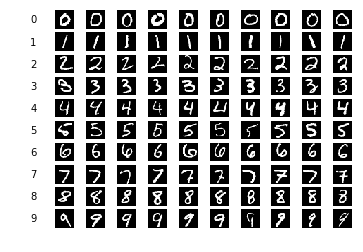

In [7]:
# Test dataの画像表示

import matplotlib.pyplot as plt

label_images = {label: [] for label in set(labels_test.tolist())}
for x, label in zip(X_test, labels_test):
    if all(len(images) >= 10 for images in label_images.values()):
        break
    if len(label_images[label]) >= 10:
        continue
    label_images[label].append(x)
    
for j, (label, images) in enumerate(label_images.items()):
    plt.subplot(10, 11, j * 11 + 1)
    plt.text(0.5, 0.5, label, ha='center', va='center')
    plt.axis('off')
    for i, image in enumerate(images):
        if i >= 10:
            continue
        plt.subplot(10, 11, j * 11 +  i + 2)
        plt.imshow(image, cmap='Greys_r')
        plt.axis('off')
plt.show()
    
del label_images

↓課題はここから

<H2> 4. Dataの前処理</H2>
<p>画像データを特微ベクトルに変換します。テキスト7章もご参考ください。 </p>

In [8]:
# 各画像は行列なのでベクトルに変換→X_trainとX_testを作成
n_samples_train =len(labels_train)
n_samples_test=len(labels_test)
X_train=X_train.reshape((n_samples_train,-1))
X_test=X_test.reshape((n_samples_test,-1))

In [9]:
# ラベルをone-hotベクトル（値がひとつだけ1で他が0のベクトル）に変換→Y_trainとY_testを作成
Y_train=to_categorical(labels_train)
Y_test=to_categorical(labels_test)
print(Y_train.shape)

(60000, 10)


　<H2> 5. Deep learningの実施

In [22]:
# モデルの準備
model=Sequential()
model.add(Dense(units=64,input_shape=(784,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(units=32))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
# Trainingの実施
model.fit(X_train,Y_train,batch_size=512,epochs=64)

Epoch 1/64
60000/60000 [==============================] - 1s 24us/step - loss: 0.1382 - acc: 0.9568
Epoch 2/64
60000/60000 [==============================] - 2s 25us/step - loss: 0.1328 - acc: 0.9587
Epoch 3/64
60000/60000 [==============================] - 2s 25us/step - loss: 0.1283 - acc: 0.9595
Epoch 4/64
60000/60000 [==============================] - 2s 26us/step - loss: 0.1238 - acc: 0.9603
Epoch 5/64
60000/60000 [==============================] - 2s 26us/step - loss: 0.1216 - acc: 0.9612
Epoch 6/64
60000/60000 [==============================] - 1s 25us/step - loss: 0.1178 - acc: 0.9621
Epoch 7/64
60000/60000 [==============================] - 2s 25us/step - loss: 0.1157 - acc: 0.9630
Epoch 8/64
60000/60000 [==============================] - 2s 25us/step - loss: 0.1099 - acc: 0.9646
Epoch 9/64
60000/60000 [==============================] - 2s 25us/step - loss: 0.1073 - acc: 0.9660
Epoch 10/64
60000/60000 [==============================] - 1s 24us/step - loss: 0.1053 - acc: 0.9658

In [25]:
# Test dataを用いてモデルを評価（accuracyを算出）
_,acc=model.evaluate(X_test,Y_test)
print('accuracy: {:.2f}'.format(acc))

10000/10000 [==============================] - 1s 63us/step
accuracy: 0.98


In [26]:
# Classification_report関数で評価結果を表示
from sklearn.metrics import classification_report
labels_pred=model.predict_classes(X_test,verbose=0)
print(classification_report(labels_test,labels_pred))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.97      0.98      0.97      1032
          3       0.96      0.98      0.97      1010
          4       0.97      0.98      0.98       982
          5       0.96      0.97      0.97       892
          6       0.98      0.97      0.98       958
          7       0.98      0.96      0.97      1028
          8       0.96      0.97      0.97       974
          9       0.98      0.96      0.97      1009

avg / total       0.98      0.98      0.98     10000



<H2>6. Training後のモデルを用いてnumber_file中の画像の数字を予測

In [14]:
# (必要なモジュールの読み込み
import numpy as image_np
import os
from PIL import Image

In [21]:
#画像を取得→画像を数値に変換→数値を1行に変換→データをモデルに入れて予測→ファイルを読み込んだ上でデータを判定

CHECK_FILE_NUM = 5
z_test = [8,9,5,0] 
for i in range(1,CHECK_FILE_NUM):
    image = Image.open('./number_file/handnumber'+str(i)+'.jpg').convert('L')
    image = image_np.asarray(image)
    print(image.shape)
    image = image.reshape((1, -1))
    result = model.predict(image)

    print("Source File Number is", './number_file/handnumber'+str(i)+'.jpg')  
    print("Source File Number is", np.round(result))
    print('answer:',z_test[i-1])

(28, 28)
Source File Number is ./number_file/handnumber1.jpg
Source File Number is [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
answer: 8
(28, 28)
Source File Number is ./number_file/handnumber2.jpg
Source File Number is [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
answer: 9
(28, 28)
Source File Number is ./number_file/handnumber3.jpg
Source File Number is [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
answer: 5
(28, 28)
Source File Number is ./number_file/handnumber4.jpg
Source File Number is [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
answer: 0


In [ ]:
# 画像を取得→画像を数値に変換→数値を1行に変換→データをモデルに入れて予測→ファイル読み込んだ上でデータを判定
# カレントディレクトリの確認
print(os.listdir(os.path.normpath("./")))
# データディレクトリの確認
print(os.listdir('./number_file/'))

import glob
DATA_PATH = "./number_file/"
handnumber = glob.glob("{0}*".format(DATA_PATH))
print(handnumber)
n_samples=len(handnumber)
images=[]
for i in range(n_samples):
    image += Image.open(handnumber[i]).convert('L')
    print(image)
    print()
print()
#画像を数値に変換

print(n_samples)